In [1]:
### calling packages

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import time
from datetime import datetime

In [2]:
# pd.set_option('display.max_rows', None)

### 0. 통일성을 위한 공통 작업

In [3]:
### matplotlib, seaborn 한글 깨짐 현상 해결

from matplotlib import font_manager, rc # matplotlib, seaborn에서 한글 깨짐 현상을 해결하기 위함

font_path = "C:/WINDOWS/FONTS/MALGUNSL.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
### 색상 통일

col=['#6B4E24','#EECA98','#EBAA4F','#6B5B45','#B8853E','#AB891A','#6B5610','#EBBC23','#F7B50F']

### 5. 벚꽃 개화 시기에 유의미한 차이를 보이는 대기오염물질이 있을까?

t-test를 이용해보자!

In [5]:
### '서울시 월별 평균 대기오염도 정보.csv'를 ATM_monthly_for_blossom이라는 데이터프레임 형태로 불러오기

ATM_monthly_for_blossom = pd.read_csv('C:/Users/izzle/Downloads/서울시 월별 평균 대기오염도 정보.csv', encoding='cp949')
ATM_monthly_for_blossom.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,202301,강남구,0.035,0.015,0.7,0.004,61.0,40.0
1,202301,강남대로,0.039,0.010,0.9,0.004,64.0,44.0
2,202301,강동구,0.030,0.012,0.7,0.003,66.0,47.0
3,202301,강변북로,0.042,0.010,0.9,0.003,63.0,45.0
4,202301,강북구,0.029,0.019,0.7,0.003,66.0,37.0
5,202301,강서구,0.036,0.016,0.8,0.004,77.0,41.0
6,202301,공항대로,0.039,0.012,0.7,0.003,67.0,41.0
7,202301,관악구,0.039,0.013,0.8,0.003,67.0,37.0
8,202301,관악산,0.013,0.036,0.4,0.004,51.0,28.0
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0


In [6]:
### 광진구 자료만 추출하기

gwangjin_monthly_for_blossom = ATM_monthly_for_blossom[ATM_monthly_for_blossom['측정소명'] == '광진구']
gwangjin_monthly_for_blossom

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0
...,...,...,...,...,...,...,...,...
13790,198705,광진구,0.035,0.009,1.1,0.029,NaN,NaN
13800,198704,광진구,0.039,0.007,1.8,0.068,NaN,NaN
13810,198703,광진구,0.030,0.006,2.0,0.069,NaN,NaN
13820,198702,광진구,0.013,0.003,3.1,0.112,NaN,NaN


In [7]:
### 결측치 확인

gwangjin_monthly_for_blossom.isnull().sum()

측정월               0
측정소명              0
이산화질소농도(ppm)      8
오존농도(ppm)         8
일산화탄소농도(ppm)      9
아황산가스(ppm)        7
미세먼지(㎍/㎥)       162
초미세먼지(㎍/㎥)      308
dtype: int64

In [8]:
### 월 컬럼 따로 만들기

gwangjin_monthly_for_blossom['year'] = gwangjin_monthly_for_blossom['측정월']//100
gwangjin_monthly_for_blossom['month'] = gwangjin_monthly_for_blossom['측정월']%100
gwangjin_monthly_for_blossom.head(10)

C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\2128958761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_monthly_for_blossom['year'] = gwangjin_monthly_for_blossom['측정월']//100
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\2128958761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_monthly_for_blossom['month'] = gwangjin_monthly_for_blossom['측정월']%100


,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,2022,12
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,2022,11
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,2022,10
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,2022,9
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,2022,8
309,202207,광진구,0.012,0.035,0.4,0.003,26.0,17.0,2022,7
359,202206,광진구,0.012,0.034,0.3,0.003,22.0,12.0,2022,6
409,202205,광진구,0.014,0.045,0.3,0.003,32.0,17.0,2022,5
459,202204,광진구,0.019,0.041,0.4,0.003,44.0,22.0,2022,4


##### Processing data for 이산화질소

In [9]:
### 이산화질소농도 결측치가 있는 행 제거

nonna_NO2_df = gwangjin_monthly_for_blossom.dropna(subset=['이산화질소농도(ppm)'])
nonna_NO2_df.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,2022,12
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,2022,11
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,2022,10
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,2022,9


In [10]:
### 결측치 재확인

nonna_NO2_df.isnull().sum()

측정월               0
측정소명              0
이산화질소농도(ppm)      0
오존농도(ppm)         1
일산화탄소농도(ppm)      2
아황산가스(ppm)        0
미세먼지(㎍/㎥)       154
초미세먼지(㎍/㎥)      300
year              0
month             0
dtype: int64

In [11]:
### 데이터 타입

nonna_NO2_df.dtypes

측정월               int64
측정소명             object
이산화질소농도(ppm)    float64
오존농도(ppm)       float64
일산화탄소농도(ppm)    float64
아황산가스(ppm)      float64
미세먼지(㎍/㎥)       float64
초미세먼지(㎍/㎥)      float64
year              int64
month             int64
dtype: object

In [12]:
### 벚꽃 개화시기(3~4월) 데이터 추출하기

# pd.set_option('display.max_rows', None)

blossom_NO2 = nonna_NO2_df[((nonna_NO2_df['month'] > 2) & (nonna_NO2_df['month'] < 5))]
blossom_NO2.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
459,202204,광진구,0.019,0.041,0.4,0.003,44.0,22.0,2022,4
509,202203,광진구,0.025,0.029,0.5,0.004,40.0,21.0,2022,3
1059,202104,광진구,0.020,0.035,0.4,0.003,41.0,18.0,2021,4
1109,202103,광진구,0.028,0.024,0.5,0.003,64.0,32.0,2021,3
1659,202004,광진구,0.019,0.033,0.5,0.003,46.0,20.0,2020,4
1709,202003,광진구,0.024,0.023,0.5,0.003,46.0,24.0,2020,3
2259,201904,광진구,0.029,0.026,0.7,0.004,43.0,24.0,2019,4
2305,201903,광진구,0.035,0.024,0.8,0.005,70.0,46.0,2019,3
2768,201804,광진구,0.031,0.032,0.4,0.003,54.0,23.0,2018,4
2807,201803,광진구,0.032,0.023,0.6,0.004,41.0,24.0,2018,3


In [13]:
### 나머지 시기 데이터 추출하기

non_blossom_NO2 = nonna_NO2_df[((nonna_NO2_df['month'] < 3) | (nonna_NO2_df['month'] > 4))]
non_blossom_NO2.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,2022,12
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,2022,11
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,2022,10
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,2022,9
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,2022,8
309,202207,광진구,0.012,0.035,0.4,0.003,26.0,17.0,2022,7
359,202206,광진구,0.012,0.034,0.3,0.003,22.0,12.0,2022,6
409,202205,광진구,0.014,0.045,0.3,0.003,32.0,17.0,2022,5
559,202202,광진구,0.024,0.028,0.6,0.003,37.0,25.0,2022,2


##### Two sample t-test for 이산화질소

H0: 이산화질소 농도의 벚꽃 개화 시기 평균과 나머지 시기 평균은 같다  
H1: 이산화질소 농도의 벚꽃 개화 시기 평균이 나머지 시기 평균에 비해 높다(단측검정)

In [14]:
blossom_NO2 = blossom_NO2['이산화질소농도(ppm)']
non_blossom_NO2 = non_blossom_NO2['이산화질소농도(ppm)']

C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\3753127049.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=blossom_NO2, palette = col, shade=True, label='벚꽃 개화 시기(3~4월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\3753127049.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=blossom_NO2, palette = col, shade=True, label='벚꽃 개화 시기(3~4월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\3753127049.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=non_blossom_NO2, palette = col, shade=True, label='나머지 시기')
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\3753127049.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=non_bl

Text(0.5, 1.0, '이산화질소 농도의 벚꽃 개화 시기 vs 나머지 시기 확률밀도함수')

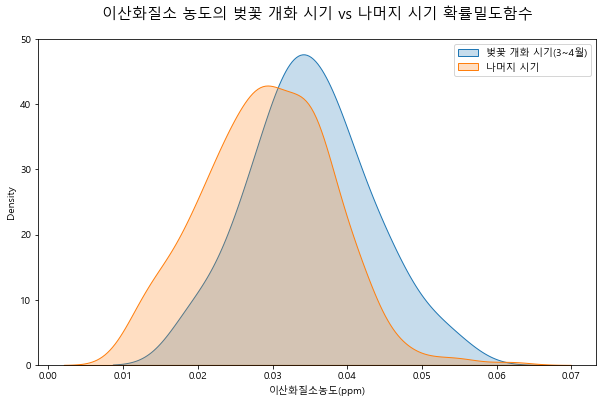

In [15]:
### 확률밀도함수

plt.figure(figsize = (10, 6))
sns.kdeplot(data=blossom_NO2, palette = col, shade=True, label='벚꽃 개화 시기(3~4월)')
sns.kdeplot(data=non_blossom_NO2, palette = col, shade=True, label='나머지 시기')
plt.legend()
plt.title('이산화질소 농도의 벚꽃 개화 시기 vs 나머지 시기 확률밀도함수', fontsize = 15, pad = 20)

# plt.savefig('이산화질소 벚꽃vs나머지 확률밀도함수.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

In [16]:
### Two sample t-test 수행

t_stat, p_value = stats.ttest_ind(blossom_NO2, non_blossom_NO2, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 5.128794460476733, p-value : 2.2244972366574967e-07


p-value < 0.05 이므로 귀무가설을 기각할 수 있다.  
이산화질소 농도의 벚꽃 개화 시기 평균이 나머지 시기 평균에 비해 높다고 말할 수 있다.

##### Processing data for 오존

In [17]:
### 오존농도 결측치가 있는 행 제거

nonna_O3_df = gwangjin_monthly_for_blossom.dropna(subset=['오존농도(ppm)'])
nonna_O3_df.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,2022,12
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,2022,11
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,2022,10
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,2022,9


In [18]:
### 결측치 재확인

nonna_O3_df.isnull().sum()

측정월               0
측정소명              0
이산화질소농도(ppm)      1
오존농도(ppm)         0
일산화탄소농도(ppm)      2
아황산가스(ppm)        0
미세먼지(㎍/㎥)       154
초미세먼지(㎍/㎥)      300
year              0
month             0
dtype: int64

In [19]:
### 월 컬럼 따로 만들기

# pd.set_option('display.max_rows', None)

nonna_O3_df['year'] = nonna_O3_df['측정월']//100
nonna_O3_df['month'] = nonna_O3_df['측정월']%100
nonna_O3_df.head(10)

C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\2375339861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonna_O3_df['year'] = nonna_O3_df['측정월']//100
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\2375339861.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonna_O3_df['month'] = nonna_O3_df['측정월']%100


,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,2022,12
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,2022,11
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,2022,10
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,2022,9
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,2022,8
309,202207,광진구,0.012,0.035,0.4,0.003,26.0,17.0,2022,7
359,202206,광진구,0.012,0.034,0.3,0.003,22.0,12.0,2022,6
409,202205,광진구,0.014,0.045,0.3,0.003,32.0,17.0,2022,5
459,202204,광진구,0.019,0.041,0.4,0.003,44.0,22.0,2022,4


In [20]:
### 데이터 타입

nonna_O3_df.dtypes

측정월               int64
측정소명             object
이산화질소농도(ppm)    float64
오존농도(ppm)       float64
일산화탄소농도(ppm)    float64
아황산가스(ppm)      float64
미세먼지(㎍/㎥)       float64
초미세먼지(㎍/㎥)      float64
year              int64
month             int64
dtype: object

In [21]:
### 벚꽃 개화시기(3~4월) 데이터 추출하기

blossom_O3 = nonna_O3_df[((nonna_O3_df['month'] > 2) & (nonna_O3_df['month'] < 5))]
blossom_O3.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
459,202204,광진구,0.019,0.041,0.4,0.003,44.0,22.0,2022,4
509,202203,광진구,0.025,0.029,0.5,0.004,40.0,21.0,2022,3
1059,202104,광진구,0.020,0.035,0.4,0.003,41.0,18.0,2021,4
1109,202103,광진구,0.028,0.024,0.5,0.003,64.0,32.0,2021,3
1659,202004,광진구,0.019,0.033,0.5,0.003,46.0,20.0,2020,4
1709,202003,광진구,0.024,0.023,0.5,0.003,46.0,24.0,2020,3
2259,201904,광진구,0.029,0.026,0.7,0.004,43.0,24.0,2019,4
2305,201903,광진구,0.035,0.024,0.8,0.005,70.0,46.0,2019,3
2768,201804,광진구,0.031,0.032,0.4,0.003,54.0,23.0,2018,4
2807,201803,광진구,0.032,0.023,0.6,0.004,41.0,24.0,2018,3


In [22]:
### 나머지 시기 데이터 추출하기

non_blossom_O3 = nonna_O3_df[((nonna_O3_df['month'] < 3) | (nonna_O3_df['month'] > 4))]
non_blossom_O3.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,2022,12
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,2022,11
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,2022,10
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,2022,9
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,2022,8
309,202207,광진구,0.012,0.035,0.4,0.003,26.0,17.0,2022,7
359,202206,광진구,0.012,0.034,0.3,0.003,22.0,12.0,2022,6
409,202205,광진구,0.014,0.045,0.3,0.003,32.0,17.0,2022,5
559,202202,광진구,0.024,0.028,0.6,0.003,37.0,25.0,2022,2


##### Two sample t-test for 오존

H0: 오존 농도의 벚꽃 개화 시기 평균과 나머지 시기 평균은 같다  
H1: 오존 농도의 벚꽃 개화 시기 평균이 나머지 시기 평균에 비해 높다(단측검정)

In [23]:
blossom_O3 = blossom_O3['오존농도(ppm)']
non_blossom_O3 = non_blossom_O3['오존농도(ppm)']

C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\781028340.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=blossom_O3, palette=col, shade=True, label = '벚꽃 개화 시기(3~4월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\781028340.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=blossom_O3, palette=col, shade=True, label = '벚꽃 개화 시기(3~4월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\781028340.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=non_blossom_O3, palette=col, shade=True, label = '나머지 시기')
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\781028340.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=non_blossom_O

Text(0.5, 1.0, '오존 농도의 벚꽃 개화 시기 vs 나머지 시기 확률밀도함수')

c:\Users\izzle\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


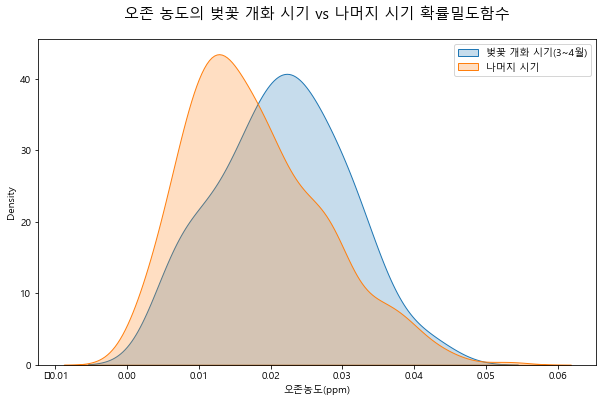

In [24]:
### 확률밀도함수

plt.figure(figsize = (10, 6))
sns.kdeplot(data=blossom_O3, palette=col, shade=True, label = '벚꽃 개화 시기(3~4월)')
sns.kdeplot(data=non_blossom_O3, palette=col, shade=True, label = '나머지 시기')
plt.legend()
plt.title('오존 농도의 벚꽃 개화 시기 vs 나머지 시기 확률밀도함수', fontsize = 15, pad = 20)

# plt.savefig('오존 벚꽃vs나머지 확률밀도함수.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

In [25]:
### Two sample t-test 수행

t_stat, p_value = stats.ttest_ind(blossom_O3, non_blossom_O3, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 3.051244341401193, p-value : 0.0012112292821281282


p-value < 0.05 이므로 귀무가설을 기각할 수 있다.  
오존 농도의 벚꽃 개화 시기 평균이 나머지 시기 평균에 비해 높다고 말할 수 있다.

##### Processing data for 미세먼지

In [26]:
### 미세먼지 결측치가 있는 행 제거

nonna_PM10_df = gwangjin_monthly_for_blossom.dropna(subset=['미세먼지(㎍/㎥)'])
nonna_PM10_df.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,2022,12
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,2022,11
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,2022,10
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,2022,9


In [27]:
### 결측치 재확인

nonna_PM10_df.isnull().sum()

측정월               0
측정소명              0
이산화질소농도(ppm)      0
오존농도(ppm)         0
일산화탄소농도(ppm)      0
아황산가스(ppm)        0
미세먼지(㎍/㎥)         0
초미세먼지(㎍/㎥)      146
year              0
month             0
dtype: int64

In [28]:
### 월 컬럼 따로 만들기

nonna_PM10_df['year'] = nonna_PM10_df['측정월']//100
nonna_PM10_df['month'] = nonna_PM10_df['측정월']%100
nonna_PM10_df.head(10)

C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\931603433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonna_PM10_df['year'] = nonna_PM10_df['측정월']//100
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\931603433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonna_PM10_df['month'] = nonna_PM10_df['측정월']%100


,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,2022,12
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,2022,11
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,2022,10
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,2022,9
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,2022,8
309,202207,광진구,0.012,0.035,0.4,0.003,26.0,17.0,2022,7
359,202206,광진구,0.012,0.034,0.3,0.003,22.0,12.0,2022,6
409,202205,광진구,0.014,0.045,0.3,0.003,32.0,17.0,2022,5
459,202204,광진구,0.019,0.041,0.4,0.003,44.0,22.0,2022,4


In [29]:
### 데이터 타입

nonna_PM10_df.dtypes

측정월               int64
측정소명             object
이산화질소농도(ppm)    float64
오존농도(ppm)       float64
일산화탄소농도(ppm)    float64
아황산가스(ppm)      float64
미세먼지(㎍/㎥)       float64
초미세먼지(㎍/㎥)      float64
year              int64
month             int64
dtype: object

In [30]:
### 벚꽃 개화시기(3~4월) 데이터 추출하기

blossom_PM10 = nonna_PM10_df[((nonna_PM10_df['month'] > 2) & (nonna_PM10_df['month'] < 5))]
blossom_PM10.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
459,202204,광진구,0.019,0.041,0.4,0.003,44.0,22.0,2022,4
509,202203,광진구,0.025,0.029,0.5,0.004,40.0,21.0,2022,3
1059,202104,광진구,0.020,0.035,0.4,0.003,41.0,18.0,2021,4
1109,202103,광진구,0.028,0.024,0.5,0.003,64.0,32.0,2021,3
1659,202004,광진구,0.019,0.033,0.5,0.003,46.0,20.0,2020,4
1709,202003,광진구,0.024,0.023,0.5,0.003,46.0,24.0,2020,3
2259,201904,광진구,0.029,0.026,0.7,0.004,43.0,24.0,2019,4
2305,201903,광진구,0.035,0.024,0.8,0.005,70.0,46.0,2019,3
2768,201804,광진구,0.031,0.032,0.4,0.003,54.0,23.0,2018,4
2807,201803,광진구,0.032,0.023,0.6,0.004,41.0,24.0,2018,3


In [31]:
### 나머지 시기 데이터 추출하기

non_blossom_PM10 = nonna_PM10_df[((nonna_PM10_df['month'] < 3) | (nonna_PM10_df['month'] > 4))]
non_blossom_PM10.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,2022,12
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,2022,11
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,2022,10
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,2022,9
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,2022,8
309,202207,광진구,0.012,0.035,0.4,0.003,26.0,17.0,2022,7
359,202206,광진구,0.012,0.034,0.3,0.003,22.0,12.0,2022,6
409,202205,광진구,0.014,0.045,0.3,0.003,32.0,17.0,2022,5
559,202202,광진구,0.024,0.028,0.6,0.003,37.0,25.0,2022,2


##### Two sample t-test for 미세먼지

H0: 미세먼지 농도의 벚꽃 개화 시기 평균과 나머지 시기 평균은 같다  
H1: 미세먼지 농도의 벚꽃 개화 시기 평균이 나머지 시기 평균에 비해 높다(단측검정)

In [32]:
blossom_PM10 = blossom_PM10['미세먼지(㎍/㎥)']
non_blossom_PM10 = non_blossom_PM10['미세먼지(㎍/㎥)']

C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\1149643558.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=blossom_PM10, palette=col, shade=True, label = '벚꽃 개화 시기(3~4월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\1149643558.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=blossom_PM10, palette=col, shade=True, label = '벚꽃 개화 시기(3~4월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\1149643558.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=non_blossom_PM10, palette=col, shade=True, label = '나머지 시기')
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\1149643558.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=non

Text(0.5, 1.0, '미세먼지 농도의 벚꽃 개화 시기 vs 나머지 시기 확률밀도함수')

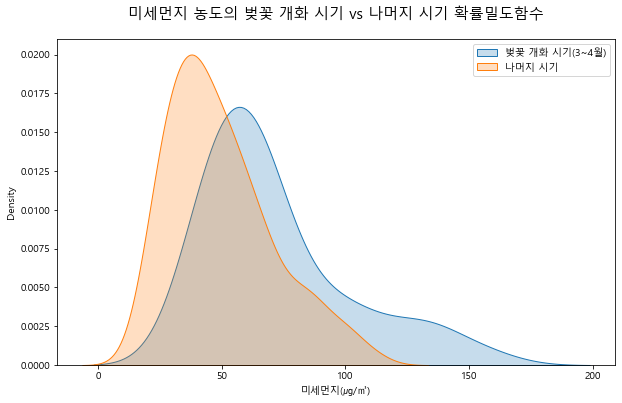

In [33]:
### 확률밀도함수

plt.figure(figsize = (10, 6))
sns.kdeplot(data=blossom_PM10, palette=col, shade=True, label = '벚꽃 개화 시기(3~4월)')
sns.kdeplot(data=non_blossom_PM10, palette=col, shade=True, label = '나머지 시기')
plt.legend()
plt.title('미세먼지 농도의 벚꽃 개화 시기 vs 나머지 시기 확률밀도함수', fontsize = 15, pad = 20)

# plt.savefig('미세먼지 벚꽃vs나머지 확률밀도함수.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

In [34]:
### Two sample t-test 수행

t_stat, p_value = stats.ttest_ind(blossom_PM10, non_blossom_PM10, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 5.927429839929678, p-value : 4.7005427852389025e-09


p-value < 0.05 이므로 귀무가설을 기각할 수 있다.  
미세먼지 농도의 벚꽃 개화 시기 평균이 나머지 시기 평균에 비해 높다고 말할 수 있다.

##### Processing data for 초미세먼지

In [35]:
### 초미세먼지 결측치가 있는 행 제거

nonna_PM25_df = gwangjin_monthly_for_blossom.dropna(subset=['초미세먼지(㎍/㎥)'])
nonna_PM25_df.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,2022,12
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,2022,11
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,2022,10
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,2022,9


In [36]:
### 결측치 재확인

nonna_PM25_df.isnull().sum()

측정월             0
측정소명            0
이산화질소농도(ppm)    0
오존농도(ppm)       0
일산화탄소농도(ppm)    0
아황산가스(ppm)      0
미세먼지(㎍/㎥)       0
초미세먼지(㎍/㎥)      0
year            0
month           0
dtype: int64

In [37]:
### 데이터 타입

nonna_PM25_df.dtypes

측정월               int64
측정소명             object
이산화질소농도(ppm)    float64
오존농도(ppm)       float64
일산화탄소농도(ppm)    float64
아황산가스(ppm)      float64
미세먼지(㎍/㎥)       float64
초미세먼지(㎍/㎥)      float64
year              int64
month             int64
dtype: object

In [38]:
### 벚꽃 개화시기(3~4월) 데이터 추출하기

# pd.set_option('display.max_rows', None)

blossom_PM25 = nonna_PM25_df[((nonna_PM25_df['month'] > 2) & (nonna_PM25_df['month'] < 5))]
blossom_PM25.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
459,202204,광진구,0.019,0.041,0.4,0.003,44.0,22.0,2022,4
509,202203,광진구,0.025,0.029,0.5,0.004,40.0,21.0,2022,3
1059,202104,광진구,0.020,0.035,0.4,0.003,41.0,18.0,2021,4
1109,202103,광진구,0.028,0.024,0.5,0.003,64.0,32.0,2021,3
1659,202004,광진구,0.019,0.033,0.5,0.003,46.0,20.0,2020,4
1709,202003,광진구,0.024,0.023,0.5,0.003,46.0,24.0,2020,3
2259,201904,광진구,0.029,0.026,0.7,0.004,43.0,24.0,2019,4
2305,201903,광진구,0.035,0.024,0.8,0.005,70.0,46.0,2019,3
2768,201804,광진구,0.031,0.032,0.4,0.003,54.0,23.0,2018,4
2807,201803,광진구,0.032,0.023,0.6,0.004,41.0,24.0,2018,3


In [39]:
### 나머지 시기 데이터 추출하기

non_blossom_PM25 = nonna_PM25_df[((nonna_PM25_df['month'] < 3) | (nonna_PM25_df['month'] > 4))]
non_blossom_PM25.head(10)

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),year,month
9,202301,광진구,0.022,0.012,0.9,0.002,61.0,40.0,2023,1
59,202212,광진구,0.018,0.014,0.5,0.002,36.0,19.0,2022,12
109,202211,광진구,0.023,0.016,0.6,0.002,37.0,21.0,2022,11
159,202210,광진구,0.018,0.020,0.5,0.003,23.0,13.0,2022,10
209,202209,광진구,0.014,0.026,0.5,0.003,20.0,10.0,2022,9
259,202208,광진구,0.012,0.028,0.5,0.003,21.0,13.0,2022,8
309,202207,광진구,0.012,0.035,0.4,0.003,26.0,17.0,2022,7
359,202206,광진구,0.012,0.034,0.3,0.003,22.0,12.0,2022,6
409,202205,광진구,0.014,0.045,0.3,0.003,32.0,17.0,2022,5
559,202202,광진구,0.024,0.028,0.6,0.003,37.0,25.0,2022,2


##### Two sample t-test for 초미세먼지

H0: 초미세먼지 농도의 벚꽃 개화 시기 평균과 나머지 시기 평균은 같다  
H1: 초미세먼지 농도의 벚꽃 개화 시기 평균이 나머지 시기 평균에 비해 높다(단측검정)

In [40]:
blossom_PM25 = blossom_PM25['초미세먼지(㎍/㎥)']
non_blossom_PM25 = non_blossom_PM25['초미세먼지(㎍/㎥)']

C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\2542406589.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=blossom_PM25, palette=col, shade=True, label = '벚꽃 개화 시기(3~4월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\2542406589.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=blossom_PM25, palette=col, shade=True, label = '벚꽃 개화 시기(3~4월)')
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\2542406589.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=non_blossom_PM25, palette=col, shade=True, label = '나머지 시기')
C:\Users\izzle\AppData\Local\Temp\ipykernel_3396\2542406589.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=non

Text(0.5, 1.0, '초미세먼지 농도의 벚꽃 개화 시기 vs 나머지 시기 확률밀도함수')

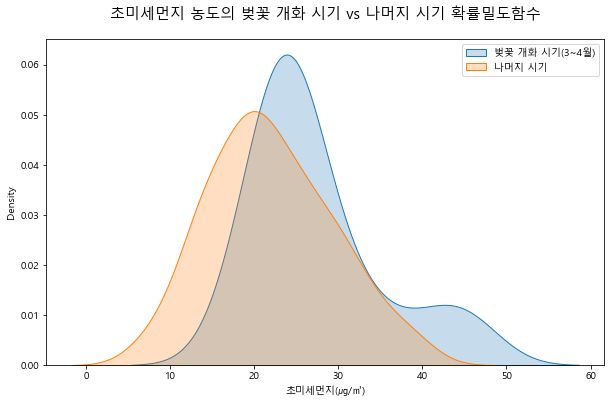

In [41]:
### 확률밀도함수

plt.figure(figsize = (10, 6))
sns.kdeplot(data=blossom_PM25, palette=col, shade=True, label = '벚꽃 개화 시기(3~4월)')
sns.kdeplot(data=non_blossom_PM25, palette=col, shade=True, label = '나머지 시기')
plt.legend()
plt.title('초미세먼지 농도의 벚꽃 개화 시기 vs 나머지 시기 확률밀도함수', fontsize = 15, pad = 20)

# plt.savefig('초미세먼지 벚꽃vs나머지 확률밀도함수.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

In [42]:
### Two sample t-test 수행

t_stat, p_value = stats.ttest_ind(blossom_PM25, non_blossom_PM25, equal_var=True, alternative="greater")
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 2.96716932569448, p-value : 0.0018062700141789245


p-value < 0.05 이므로 귀무가설을 기각할 수 있다.  
초미세먼지 농도의 벚꽃 개화 시기 평균이 나머지 시기 평균에 비해 높다고 말할 수 있다.